In [152]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path

In [153]:
# Load the CSV file
csv_file = Path("Dataset/salaries.csv")
salaries_df = pd.read_csv(csv_file)

# Display sample data
salaries_df.head()

work_year experience_level employment_type           job_title  salary  \
0       2023               EN              FT        Data Analyst   75000   
1       2023               EN              FT        Data Analyst   60000   
2       2023               MI              FT  Analytics Engineer  185700   
3       2023               MI              FT  Analytics Engineer  165000   
4       2023               SE              FT       Data Engineer  160000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD          75000                 US           100   
1             USD          60000                 US           100   
2             USD         185700                 US             0   
3             USD         165000                 US             0   
4             USD         160000                 US           100   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [154]:
# Check for missing data
salaries_df.count()

work_year             3006
experience_level      3006
employment_type       3006
job_title             3006
salary                3006
salary_currency       3006
salary_in_usd         3006
employee_residence    3006
remote_ratio          3006
company_location      3006
company_size          3006
dtype: int64

In [155]:
# Identify type of data
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [156]:
# Select companies locate in US
us_df = salaries_df.loc[salaries_df["company_location"]=="US",:]
us_df.head()

work_year experience_level employment_type           job_title  salary  \
0       2023               EN              FT        Data Analyst   75000   
1       2023               EN              FT        Data Analyst   60000   
2       2023               MI              FT  Analytics Engineer  185700   
3       2023               MI              FT  Analytics Engineer  165000   
4       2023               SE              FT       Data Engineer  160000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD          75000                 US           100   
1             USD          60000                 US           100   
2             USD         185700                 US             0   
3             USD         165000                 US             0   
4             USD         160000                 US           100   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [157]:
us_df.count()


work_year             2382
experience_level      2382
employment_type       2382
job_title             2382
salary                2382
salary_currency       2382
salary_in_usd         2382
employee_residence    2382
remote_ratio          2382
company_location      2382
company_size          2382
dtype: int64

In [158]:
# how does Remote(work from home or overseas) affect job title, salary

In [159]:
work_overseas = us_df.loc[us_df["company_location"] != us_df["employee_residence"],:]
work_overseas.count()

work_year             40
experience_level      40
employment_type       40
job_title             40
salary                40
salary_currency       40
salary_in_usd         40
employee_residence    40
remote_ratio          40
company_location      40
company_size          40
dtype: int64

In [160]:
work_overseas.head(40)

work_year experience_level employment_type  \
108        2023               EN              FT   
475        2023               EN              FT   
714        2023               EN              FT   
881        2023               EN              FT   
956        2022               EN              PT   
1169       2022               MI              FT   
1379       2022               EN              FL   
1629       2022               EN              PT   
1752       2022               EN              PT   
1954       2022               EN              FT   
1998       2022               EN              FT   
2056       2022               MI              CT   
2086       2022               SE              FT   
2183       2022               MI              FT   
2317       2022               SE              FT   
2406       2022               MI              FT   
2678       2022               MI              FT   
2688       2022               SE              FT   
2702       2022               SE              FT   
2723       2022               MI              FT   
2730       2022               MI              FL   
2736       2021               MI              FT   
2768       2020               SE              FT   
2787       2021               EN              PT   
2798       2021               SE              FT   
2805       2020               MI              FT   
2809       2021               EX              FT   
2825       2021               MI              FT   
2828       2021               MI              FT   
2835       2021               SE              FT   
2888       2021               SE              FT   
2900       2021               SE              FT   
2915       2021               MI              FT   
2918       2021               MI              FT   
2937       2020               MI              FT   
2947       2021               MI              FL   
2952       2021               SE              FT   
2972       2020               SE              FL   
2986       2021               EN              PT   
2994       2020               MI              FT   

                               job_title    salary salary_currency  \
108                         Data Analyst    100000             USD   
475                         Data Analyst     50000             USD   
714                         Data Analyst     30000             USD   
881                       Data Scientist     50000             USD   
956                         Data Analyst     24000             EUR   
1169                      Data Scientist   2500000             INR   
1379           Data Analytics Consultant     50000             USD   
1629                          BI Analyst     12000             USD   
1752                        Data Analyst    125404             USD   
1954                        Data Analyst     20000             USD   
1998                     Data Specialist    105000             USD   
2056                        NLP Engineer     60000             USD   
2086            Data Engineering Manager    193000             USD   
2183  Applied Machine Learning Scientist     75000             USD   
2317                  Analytics Engineer     48000             USD   
2406                        AI Scientist    200000             USD   
2678  Applied Machine Learning Scientist     75000             USD   
2688                        Head of Data    200000             USD   
2702                      Data Scientist    100000             USD   
2723                      Data Scientist     48000             USD   
2730                      Data Scientist    100000             USD   
2736  Applied Machine Learning Scientist     38400             USD   
2768                      Data Scientist     60000             EUR   
2787                        AI Scientist     12000             USD   
2798                        Data Analyst     80000             USD   
2805                      Data Scientist     45760   

In [161]:
work_overseas_grouped = work_overseas.groupby(["job_title"], as_index = False)["salary_in_usd"].mean()
# work_overseas_grouped
job_title_overseas_mean_salary_df= pd.DataFrame(work_overseas_grouped[["job_title","salary_in_usd"]])
job_title_overseas_mean_salary_df["salary_in_usd"] =pd.to_numeric(job_title_overseas_mean_salary_df["salary_in_usd"].map("{:.2f}".format))
job_title_overseas_mean_salary_df=job_title_overseas_mean_salary_df.rename(columns = {"salary_in_usd":"overseas_salary(USD$)"})
job_title_overseas_mean_salary_df


job_title  overseas_salary(USD$)
0                         AI Scientist               74666.67
1                   Analytics Engineer               48000.00
2   Applied Machine Learning Scientist               62800.00
3                           BI Analyst               12000.00
4                      BI Data Analyst               93129.50
5                  Cloud Data Engineer              160000.00
6             Computer Vision Engineer               60000.00
7    Computer Vision Software Engineer               95746.00
8                         Data Analyst               61517.14
9            Data Analytics Consultant               50000.00
10                       Data Engineer               58935.00
11            Data Engineering Manager              193000.00
12                Data Science Manager               54094.00
13                      Data Scientist               56207.75
14                     Data Specialist              105000.00
15                        Head of Data              200000.00
16                  Lead Data Engineer              108000.00
17                        NLP Engineer               60000.00
18                  Research Scientist               50000.00

In [162]:
work_local = us_df.loc[us_df["company_location"] == us_df["employee_residence"],:]
work_local.head(40)

work_year experience_level employment_type                  job_title  \
0        2023               EN              FT               Data Analyst   
1        2023               EN              FT               Data Analyst   
2        2023               MI              FT         Analytics Engineer   
3        2023               MI              FT         Analytics Engineer   
4        2023               SE              FT              Data Engineer   
5        2023               SE              FT              Data Engineer   
6        2023               SE              FT               Data Analyst   
7        2023               SE              FT               Data Analyst   
8        2023               SE              FT   Data Operations Engineer   
9        2023               SE              FT   Data Operations Engineer   
10       2023               SE              FT  Machine Learning Engineer   
11       2023               SE              FT  Machine Learning Engineer   
12       2023               SE              FT              Data Engineer   
13       2023               SE              FT              Data Engineer   
22       2023               SE              FT              Data Engineer   
23       2023               SE              FT              Data Engineer   
24       2022               SE              FT               BI Developer   
25       2021               MI              FT          Data Science Lead   
26       2023               SE              FT              Data Engineer   
27       2023               SE              FT              Data Engineer   
30       2023               SE              FT         Analytics Engineer   
31       2023               SE              FT         Analytics Engineer   
32       2023               SE              FT  Machine Learning Engineer   
33       2023               SE              FT  Machine Learning Engineer   
34       2023               SE              FT             Data Scientist   
35       2023               SE              FT             Data Scientist   
36       2023               SE              FT  Machine Learning Engineer   
37       2023               SE              FT  Machine Learning Engineer   
38       2023               MI              FT             Data Scientist   
39       2023               MI              FT             Data Scientist   
40       2023               SE              FT              Data Engineer   
41       2023               SE              FT              Data Engineer   
42       2023               SE              FT       Data Science Manager   
43       2023               SE              FT       Data Science Manager   
44       2023               MI              FT     Data Analytics Manager   
45       2023               MI              FT     Data Analytics Manager   
46       2023               EX              FT              Data Engineer   
47       2023               EX              FT              Data Engineer   
48       2023               SE              FT             Data Architect   
49       2023               SE              FT             Data Architect   

    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0    75000             USD          75000                 US           100   
1    60000             USD          60000                 US           100   
2   185700             USD         185700                 US             0   
3   165000             USD         165000                 US             0   
4   160000             USD         160000                 US           100   
5   130000             USD         130000                 US           100   
6   169000             USD         169000                 US             0   
7   110600             USD         110600                 US             0   
8   193000             USD         193000                 US           100   
9   136850             USD         136850                 US      

In [163]:
work_local.count()


work_year             2342
experience_level      2342
employment_type       2342
job_title             2342
salary                2342
salary_currency       2342
salary_in_usd         2342
employee_residence    2342
remote_ratio          2342
company_location      2342
company_size          2342
dtype: int64

In [164]:
# gruped by job_title
work_local_grouped = work_local.groupby(["job_title"], as_index = False)["salary_in_usd"].mean()

#new dataframe 
job_title_local_mean_salary_df= pd.DataFrame(work_local_grouped[["job_title","salary_in_usd"]])
job_title_local_mean_salary_df["salary_in_usd"] =pd.to_numeric(job_title_local_mean_salary_df["salary_in_usd"].map("{:.2f}".format))
job_title_local_mean_salary_df=job_title_local_mean_salary_df.rename(columns = {"salary_in_usd":"local_salary(USD$)"})
job_title_local_mean_salary_df.head()
# job_title_local_mean_salary_df.count()
# work_local_grouped.count()

job_title  local_salary(USD$)
0                        AI Scientist           142500.00
1                  Analytics Engineer           155292.86
2              Applied Data Scientist           238000.00
3   Applied Machine Learning Engineer           130000.00
4  Applied Machine Learning Scientist           213500.00

In [165]:
avg_job_title_salary_df= pd.merge(job_title_local_mean_salary_df, job_title_overseas_mean_salary_df, on="job_title")
avg_job_title_salary_df.head(20)

job_title  local_salary(USD$)  \
0                         AI Scientist           142500.00   
1                   Analytics Engineer           155292.86   
2   Applied Machine Learning Scientist           213500.00   
3                           BI Analyst           121200.00   
4                      BI Data Analyst            77500.00   
5             Computer Vision Engineer           193000.00   
6    Computer Vision Software Engineer            70000.00   
7                         Data Analyst           116609.34   
8            Data Analytics Consultant           113000.00   
9                        Data Engineer           154163.55   
10            Data Engineering Manager           159000.00   
11                Data Science Manager           200915.81   
12                      Data Scientist           156302.35   
13                     Data Specialist           123636.36   
14                        Head of Data           200000.00   
15                  Lead Data Engineer           276000.00   
16                        NLP Engineer           205000.00   
17                  Research Scientist           187790.48   

    overseas_salary(USD$)  
0                74666.67  
1                48000.00  
2                62800.00  
3                12000.00  
4                93129.50  
5                60000.00  
6                95746.00  
7                61517.14  
8                50000.00  
9                58935.00  
10              193000.00  
11               54094.00  
12               56207.75  
13              105000.00  
14              200000.00  
15              108000.00  
16               60000.00  
17               50000.00

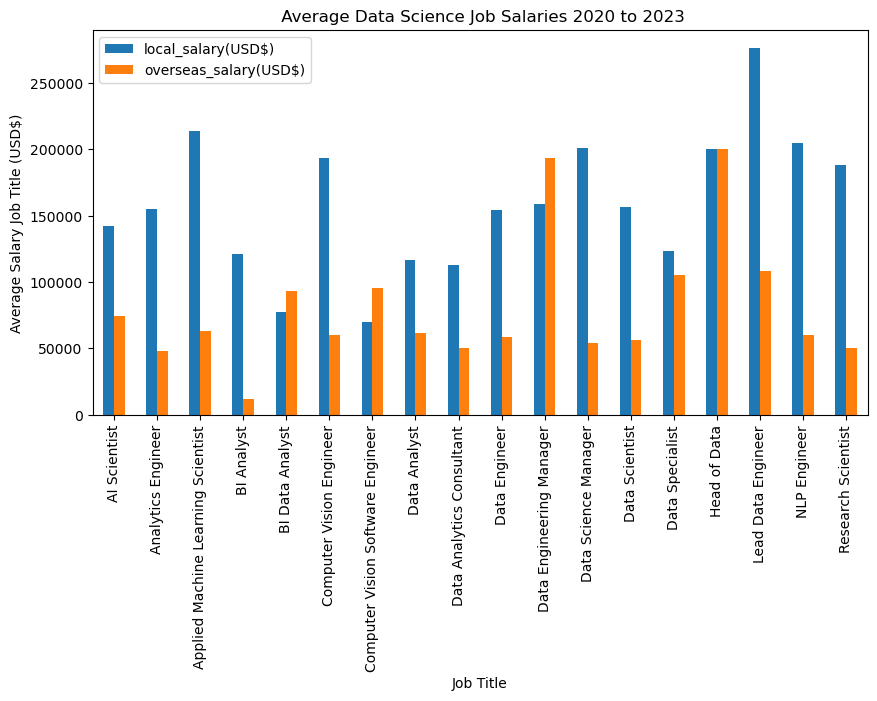

In [166]:
multi_plot = avg_job_title_salary_df.plot(kind="bar", figsize=(10,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(avg_job_title_salary_df["job_title"], rotation=90)
plt.title(" Average Data Science Job Salaries 2020 to 2023")
plt.xlabel('Job Title')
plt.ylabel('Average Salary Job Title (USD$)')
plt.show()
# plt.tight_layout()

In [167]:
# second question
# Identify the relationship between residence(local jobs) and remote(remote jobs) ratio 

In [168]:
work_overseas_grouped = work_overseas.groupby(["job_title"], as_index = False)["remote_ratio"].mean()
job_title_overseas_mean_remote_ratio_df= pd.DataFrame(work_overseas_grouped[["job_title","remote_ratio"]])
job_title_overseas_mean_remote_ratio_df["remote_ratio"] =pd.to_numeric(job_title_overseas_mean_remote_ratio_df["remote_ratio"].map("{:.0f}".format))
job_title_overseas_mean_remote_ratio_df=job_title_overseas_mean_remote_ratio_df.rename(columns = {"remote_ratio":"mean_overseas_remote_ratio"})
job_title_overseas_mean_remote_ratio_df

job_title  mean_overseas_remote_ratio
0                         AI Scientist                         100
1                   Analytics Engineer                         100
2   Applied Machine Learning Scientist                         100
3                           BI Analyst                         100
4                      BI Data Analyst                          75
5                  Cloud Data Engineer                         100
6             Computer Vision Engineer                         100
7    Computer Vision Software Engineer                         100
8                         Data Analyst                          79
9            Data Analytics Consultant                         100
10                       Data Engineer                          33
11            Data Engineering Manager                         100
12                Data Science Manager                          50
13                      Data Scientist                         100
14                     Data Specialist                         100
15                        Head of Data                         100
16                  Lead Data Engineer                          75
17                        NLP Engineer                         100
18                  Research Scientist                         100

In [169]:
work_local_grouped = work_local.groupby(["job_title"], as_index = False)["remote_ratio"].mean()

#new dataframe 
job_title_local_mean_remote_ratio_df= pd.DataFrame(work_local_grouped[["job_title","remote_ratio"]])
job_title_local_mean_remote_ratio_df["remote_ratio"] =pd.to_numeric(job_title_local_mean_remote_ratio_df["remote_ratio"].map("{:.0f}".format))
job_title_local_mean_remote_ratio_df=job_title_local_mean_remote_ratio_df.rename(columns = {"remote_ratio":"mean_local_remote_ratio"})
job_title_local_mean_remote_ratio_df


job_title  mean_local_remote_ratio
0                          AI Scientist                       75
1                    Analytics Engineer                       58
2                Applied Data Scientist                      100
3     Applied Machine Learning Engineer                        0
4    Applied Machine Learning Scientist                       50
..                                  ...                      ...
62  Principal Machine Learning Engineer                      100
63                 Product Data Analyst                      100
64                    Research Engineer                       20
65                   Research Scientist                       24
66                 Staff Data Scientist                      100

[67 rows x 2 columns]

In [170]:
avg_job_title_remote_ratio_df= pd.merge(job_title_local_mean_remote_ratio_df, job_title_overseas_mean_remote_ratio_df, on="job_title")
avg_job_title_remote_ratio_df

job_title  mean_local_remote_ratio  \
0                         AI Scientist                       75   
1                   Analytics Engineer                       58   
2   Applied Machine Learning Scientist                       50   
3                           BI Analyst                       10   
4                      BI Data Analyst                       62   
5             Computer Vision Engineer                       20   
6    Computer Vision Software Engineer                      100   
7                         Data Analyst                       46   
8            Data Analytics Consultant                      100   
9                        Data Engineer                       42   
10            Data Engineering Manager                       67   
11                Data Science Manager                       47   
12                      Data Scientist                       51   
13                     Data Specialist                       45   
14                        Head of Data                       33   
15                  Lead Data Engineer                        0   
16                        NLP Engineer                        0   
17                  Research Scientist                       24   

    mean_overseas_remote_ratio  
0                          100  
1                          100  
2                          100  
3                          100  
4                           75  
5                          100  
6                          100  
7                           79  
8                          100  
9                           33  
10                         100  
11                          50  
12                         100  
13                         100  
14                         100  
15                          75  
16                         100  
17                         100

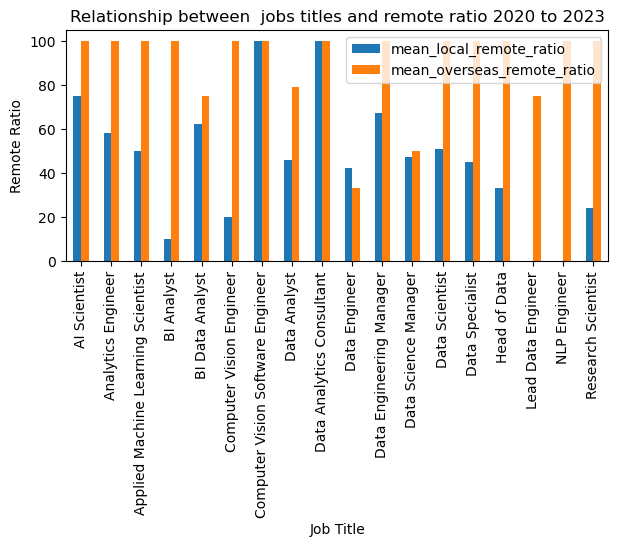

In [211]:
# local_remote_ratio_mean =avg_job_title_remote_ratio_df["mean_local_remote_ratio"]
# jobTitle = avg_job_title_remote_ratio_df["job_title"]
# # correlation = st.pearsonr(jobTitle ,local_remote_ratio_mean)
# # plt.scatter(x,y)
# plt.scatter(jobTitle,local_remote_ratio_mean)
# plt.set_xticklabels(avg_job_title_salary_df["job_title"], rotation=90)
# plt.title('Relationship between local jobs and local remote ratio')
# plt.xlabel('Job Title')
# plt.ylabel('Average Remote Ratio')
# print(f"The correlation between job local average salary and job overseas average salary is {round(correlation[0],2)}")
# plt.show()

multi_plot = avg_job_title_remote_ratio_df.plot(kind="bar", figsize=(7,3))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(avg_job_title_remote_ratio_df["job_title"], rotation=90)
plt.title("Relationship between  jobs titles and remote ratio 2020 to 2023")
plt.xlabel('Job Title')
plt.ylabel('Remote Ratio')
plt.show()

In [175]:
work_jobTitle_mean_salary_grouped = us_df.groupby(["job_title"], as_index = False)[["salary_in_usd","remote_ratio"]].mean()
# work_overseas_grouped
job_title_mean_salary_grouped_df= pd.DataFrame(work_jobTitle_mean_salary_grouped[["job_title","remote_ratio","salary_in_usd"]])
job_title_mean_salary_grouped_df["salary_in_usd"] =pd.to_numeric(job_title_mean_salary_grouped_df["salary_in_usd"].map("{:.2f}".format))
job_title_mean_salary_grouped_df["remote_ratio"] =pd.to_numeric(job_title_mean_salary_grouped_df["remote_ratio"].map("{:.2f}".format))
job_title_mean_salary_grouped_df=job_title_mean_salary_grouped_df.rename(columns = {"salary_in_usd":"mean_salary(USD$)"})
job_title_mean_salary_grouped_df=job_title_mean_salary_grouped_df.rename(columns = {"remote_ratio":"mean_remote_ratio"})
job_title_mean_salary_grouped_df


job_title  mean_remote_ratio  mean_salary(USD$)
0                          AI Scientist              85.71          113428.57
1                    Analytics Engineer              58.59          153616.41
2                Applied Data Scientist             100.00          238000.00
3     Applied Machine Learning Engineer               0.00          130000.00
4    Applied Machine Learning Scientist              71.43          148914.29
..                                  ...                ...                ...
63  Principal Machine Learning Engineer             100.00          190000.00
64                 Product Data Analyst             100.00          120000.00
65                    Research Engineer              20.00          161716.27
66                   Research Scientist              25.58          184586.05
67                 Staff Data Scientist             100.00          105000.00

[68 rows x 3 columns]

The correlation between job title average salary and average remote ratio is 0.05


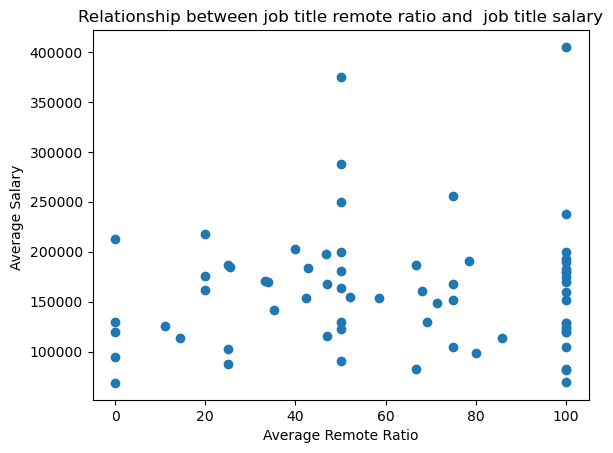

In [210]:
mean_salary =job_title_mean_salary_grouped_df["mean_salary(USD$)"]
mean_remote_ratio = job_title_mean_salary_grouped_df["mean_remote_ratio"]
correlation = st.pearsonr(mean_remote_ratio,mean_salary)
ax = plt.subplots()
# plt.scatter(x,y)
nranges=["0 - 49 = No remote work", "50-79 = Partially remote", "80-100 = Fully remote "]

plt.scatter(mean_remote_ratio,mean_salary)
plt.title('Relationship between job title remote ratio and  job title salary')
plt.xlabel('Average Remote Ratio')
plt.ylabel('Average Salary ')

print(f"The correlation between job title average salary and average remote ratio is {round(correlation[0],2)}")
plt.show()

